In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO

In [2]:
datafile = "../../data/processed/bc.csv"
df = pd.read_csv(datafile, index_col='Sample')
cols = df.columns
x = df[cols[:-1]]
y = pd.get_dummies(df[cols[-1]])[2]

In [47]:
dt = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.005)

In [48]:
dt.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.005, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
dt.get_params()

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.005,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [50]:
dt.decision_path(x)

<683x39 sparse matrix of type '<class 'numpy.int64'>'
	with 2978 stored elements in Compressed Sparse Row format>

In [51]:
dot_data = StringIO()

In [52]:
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True)

In [53]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

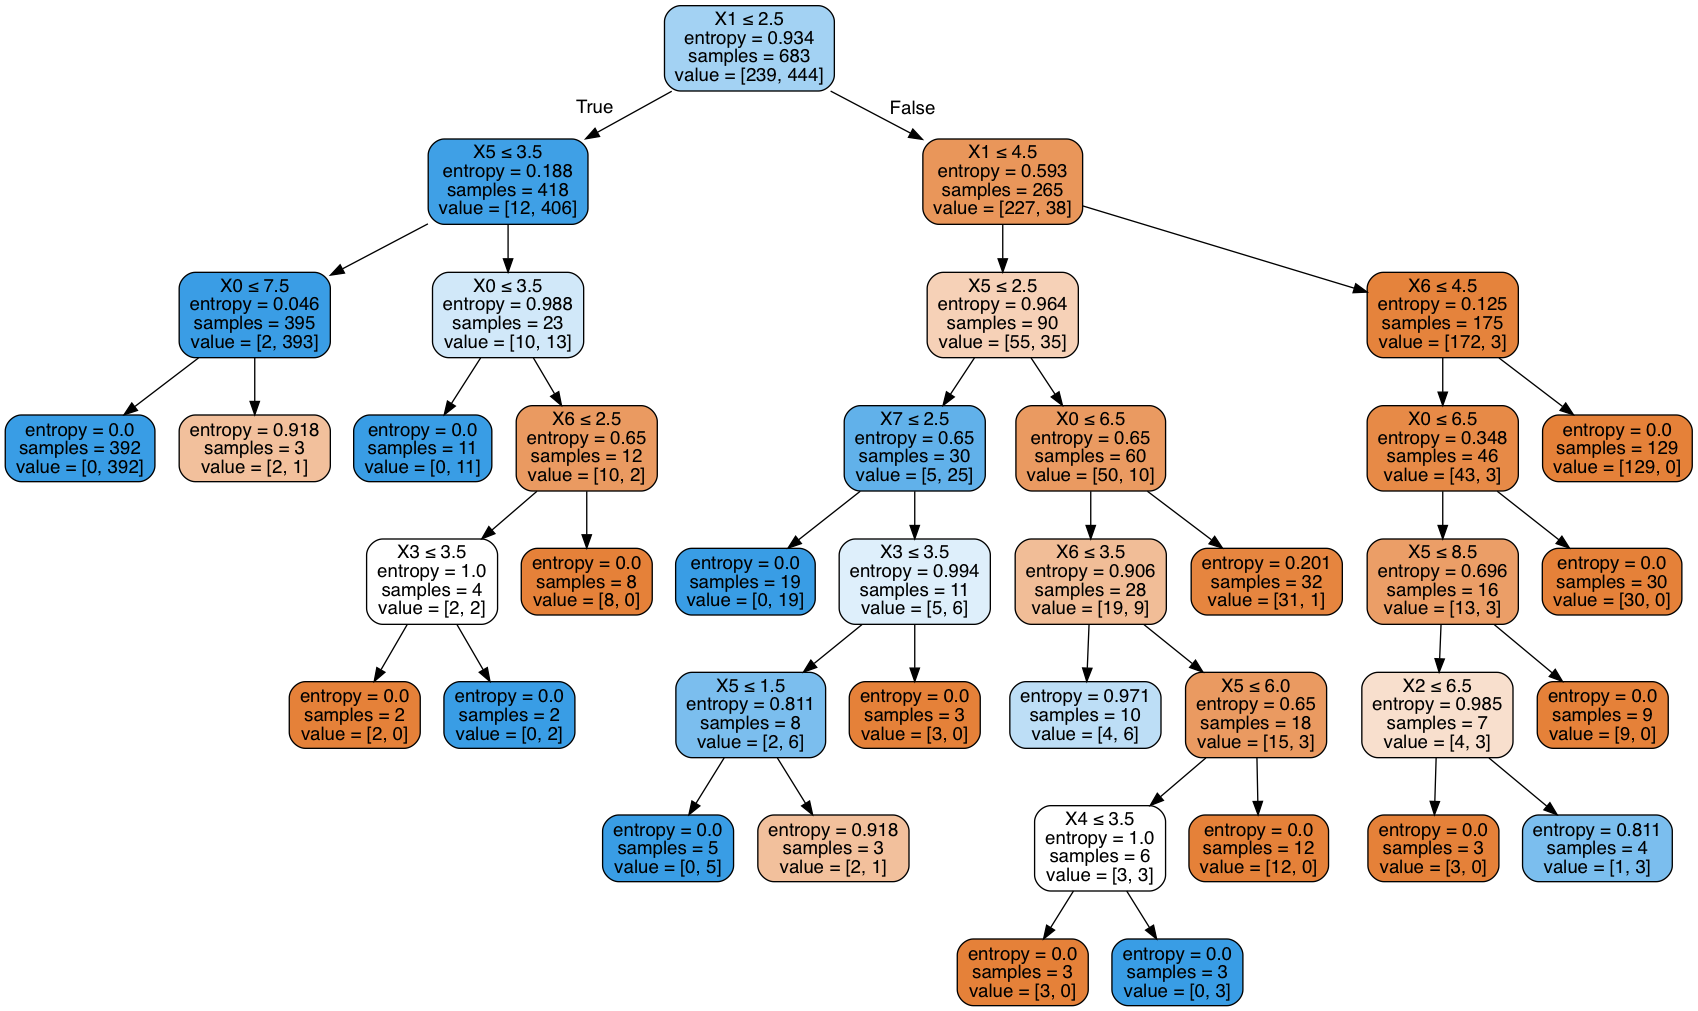

In [54]:
Image(graph.create_png())